In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [4]:
df2=df.drop(['Unnamed: 0', 'key', 'pickup_datetime'],axis=1)
df2.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5


In [41]:
df2.dropna(inplace=True)

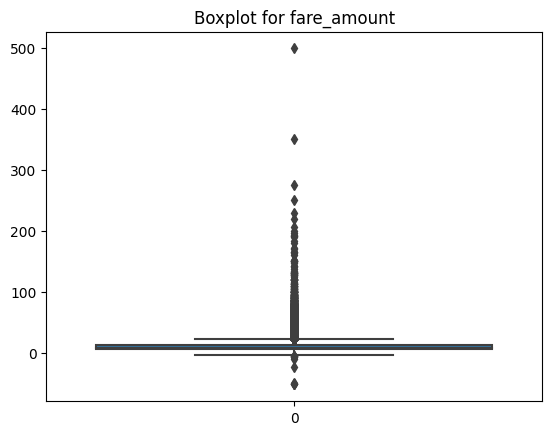

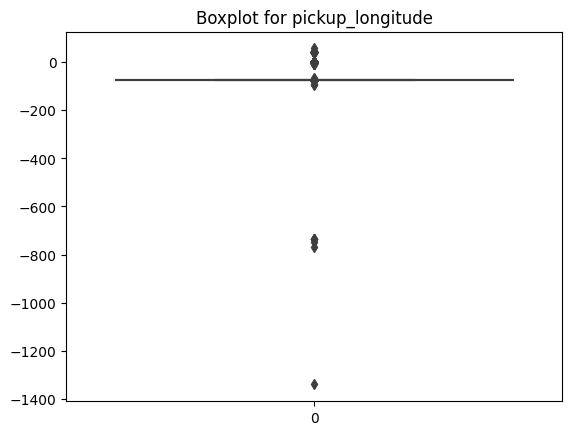

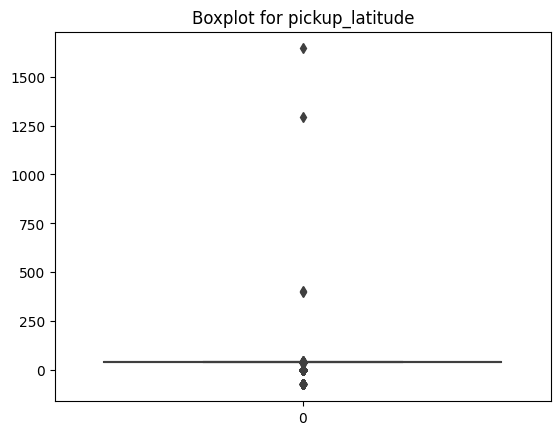

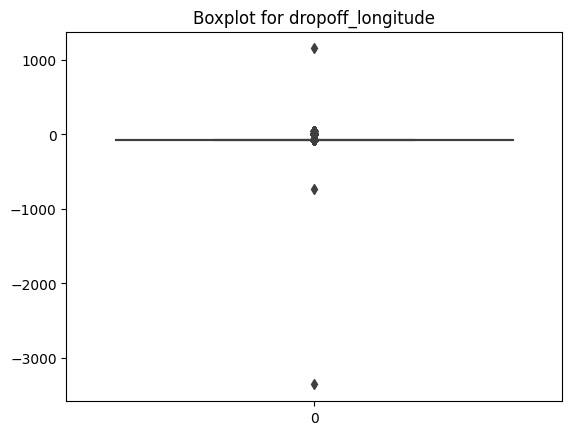

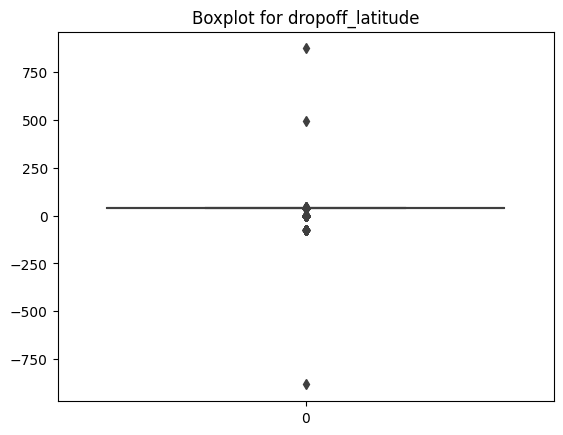

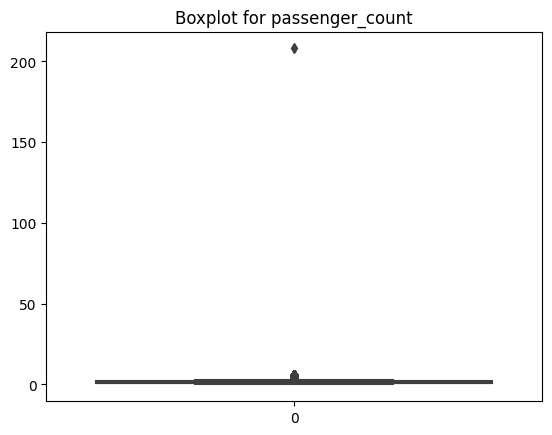

In [42]:
# to check outliers
for i in df2.columns:
    sns.boxplot(data=df2[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

<Axes: >

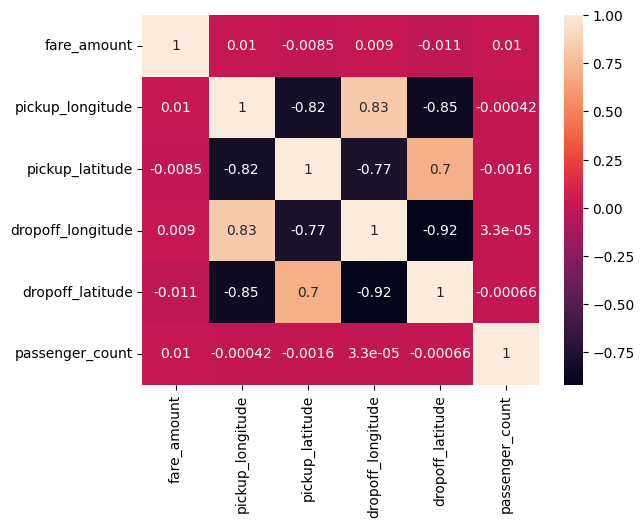

In [43]:
sns.heatmap(df2.corr(),annot=True)

In [44]:
x=df2.drop('fare_amount',axis=1)
y=df2['fare_amount']

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(x)

array([[0.90600001, 0.06677805, 0.72782548, 0.5258549 , 0.00480769],
       [0.90600392, 0.06677215, 0.72782654, 0.52587035, 0.00480769],
       [0.90599627, 0.06677945, 0.72783367, 0.52588307, 0.00480769],
       ...,
       [0.90600988, 0.0667886 , 0.72785664, 0.52583745, 0.00961538],
       [0.90600193, 0.06677054, 0.72782909, 0.52583906, 0.00480769],
       [0.90601104, 0.06676741, 0.72782858, 0.52588088, 0.00480769]])

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)
x_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
163673,-73.982848,40.830005,-73.979100,40.828892,1
88514,-73.988393,40.778666,-73.988463,40.734774,1
136407,-73.994253,40.730628,-73.981817,40.727398,5
61527,-73.907315,40.776385,-73.911112,40.777727,1
19242,-73.965517,40.758447,-73.996840,40.762935,1
...,...,...,...,...,...
151536,-73.988160,40.723727,-73.993213,40.735907,1
55293,-73.975338,40.761143,-74.000925,40.725812,1
49751,-74.013714,40.720279,-73.965225,40.755739,2
136768,-73.980840,40.784482,-73.959785,40.767712,2


# LINEAR REGRESSION

In [47]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred =lr.predict(x_test)
y_pred[:5]

array([11.29943221, 11.29962243, 11.2996474 , 11.2997967 , 11.29943753])

In [48]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 96.61410931675427
Root Mean Squared Error (RMSE): 9.829247647544255
R-squared (R²): 0.00028616279030757585


# RANDOM FOREST REGRESSION

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
y_pred_rf[:5]

array([ 6.33 , 13.304,  5.81 ,  5.408, 13.896])

In [52]:
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred_rf)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 23.15123458599176
Root Mean Squared Error (RMSE): 4.81157298458537
R-squared (R²): 0.7604427580217834


In [53]:
new_pred=rf_model.predict([[-73.982848,40.830005,-73.979100,40.828892,1]])
new_pred

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7.543])